In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import random
import pandas as pd
import pandas
import matplotlib.patches as mpatches

# Valores infinitos são tratatos como NaN (valroes que podem ser considerados infinitos por exemplo, são valores dividos por zero)
pandas.options.mode.use_inf_as_na = True

# Tornar as figuras interativas
%matplotlib inline

# Tamanho padrão das figuras, podendo ser modificadas mais tarde
rcParams['figure.figsize'] = 15,9

In [2]:
# Este dataset foi encontrado em https://www.kaggle.com/kedokedokedo/vgsales
# Utilizado neste projeto com propósito de estudos
vgsales = pd.read_csv('vgsales.csv')

In [3]:
# Verificando estatísticas básicas do dataset
# Valores max e min, média e possíveis outliers

vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
# Tipo dos dados

In [5]:
vgsales.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
                 ...   
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
Length: 11, dtype: object

In [6]:
# Verificar nulos
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
# Verifica se existe dado ausente
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
               ... 
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
Length: 11, dtype: int64

In [8]:
# De um total de 16598 linhas temos 271 valores nulos na coluna Year
# São eles:

nulos = vgsales[vgsales.isnull().any(axis=1)]
nulos

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [9]:
# Parece que também temos dados nulos no Publisher, aumentando assim a quantidade de linhas com valores nulos em nosso data set.
# O que faremos com eles, decidiremos mais tarde

In [10]:
#Vamos contar o valores existentes por Platform
vgsales.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
        ... 
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, Length: 31, dtype: int64

In [11]:
# DS Vendeu bastante no decorrer dos anos

In [12]:
# Que tal uma amostra do nosso DataFrame?
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [13]:
# VGSALES sem valores nulos
vgsales_semnul = vgsales.loc[(vgsales.Year.notnull()) & (vgsales.Publisher.notnull())]
vgsales_semnul.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
# Vamos ver por Platform, o genero do jogo vendido, a quantidade vendida por ano, e a media global de vendas
vgsales_semnul.groupby(['Platform','Genre', 'Year']).agg({'Year':'count', 'Global_Sales':'mean'})

Year  Global_Sales
Platform Genre    Year                      
2600     Action   1980.0     1      0.340000
                  1981.0    25      0.593600
                  1982.0    18      0.362222
                  1983.0     7      0.408571
                  1987.0     2      0.560000
...                        ...           ...
XOne     Sports   2015.0    13      0.730000
                  2016.0     9      0.415556
         Strategy 2013.0     1      0.160000
                  2015.0     1      0.200000
                  2016.0     1      0.020000

[1803 rows x 2 columns]

Text(2002, 1424, '2008, 1428 vendas')

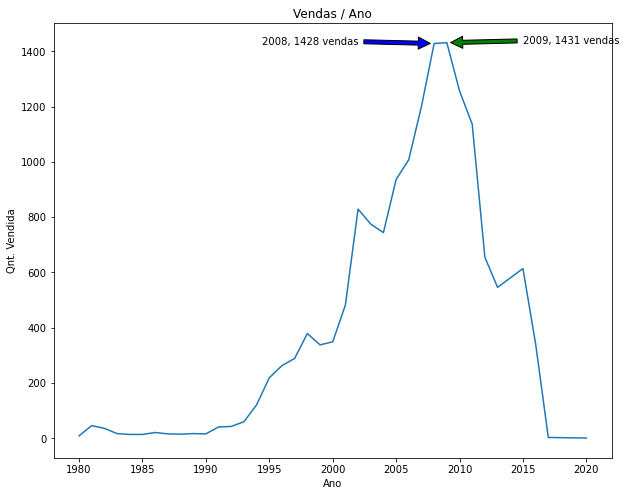

In [15]:
## Que tal vermos no gráfico, a representatividade de vendas/ano
rcParams['figure.figsize'] = 10,8
plt.title('Vendas / Ano')
plt.xlabel('Ano')
plt.ylabel('Qnt. Vendida')
plt.plot(vgsales_semnul.groupby('Year').agg({'Global_Sales':'count'}))
plt.annotate('2009, 1431 vendas', xy=(2009,1431), xytext=(2015, 1427),
            arrowprops=dict(facecolor='g', shrink=0.05))
plt.annotate('2008, 1428 vendas', xy=(2008, 1428), xytext=(2002, 1424),
            arrowprops=dict(facecolor='b', shrink=0.05),  
             horizontalalignment='right')


In [16]:
# Conforme podemos ver no gráfico, o ano que mais vendeu foi o ano de 2009

Text(10.5, 578, '570 vendidos')

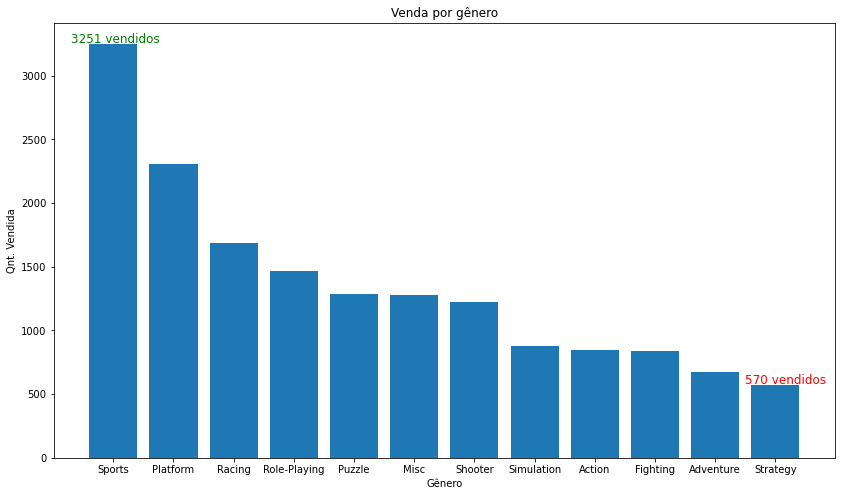

In [17]:
# Qual foi o gênero mais vendido e menos vendido?
rcParams['figure.figsize'] = 14,8
plt.bar(vgsales_semnul.Genre.unique(), vgsales_semnul.Genre.value_counts())
maisvendido = str(vgsales_semnul.Genre.value_counts().max()) + (' vendidos')
menosvendido = str(vgsales_semnul.Genre.value_counts().min()) + (' vendidos')
plt.title('Venda por gênero')
plt.xlabel('Gênero')
plt.ylabel('Qnt. Vendida')
plt.annotate(maisvendido, size=12, color='g', xy=(0, 3262), xytext=(-0.7, 3262))
plt.annotate(menosvendido, size=12, color='r', xy=(0, 578), xytext=(10.5,578))

In [18]:
# Podemos ver que o gênero mais vendido foi o de Sports e o menos vendido foi o de Strategy

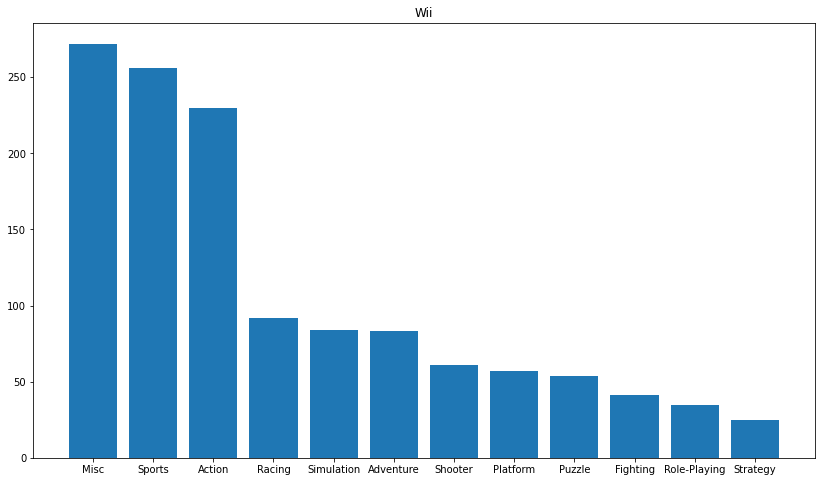


Aqui podemos ver que o Wii vendeu mais jogos do gênero Misc com um total de 272 jogos vendidos

Por outro lado vemos que o Wii não fez muito sucesso com jogos do tipo Strategy vendendo apenas 25.

********************************************************************************


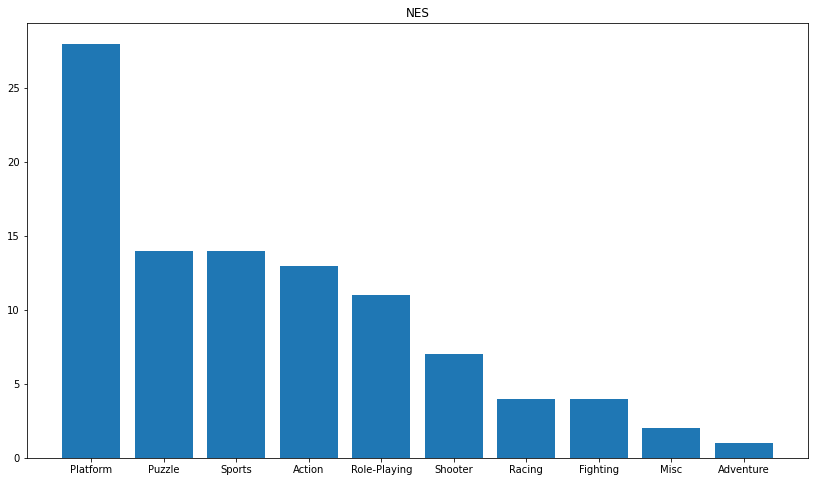


Aqui podemos ver que o NES vendeu mais jogos do gênero Platform com um total de 28 jogos vendidos

Por outro lado vemos que o NES não fez muito sucesso com jogos do tipo Adventure vendendo apenas 1.

********************************************************************************


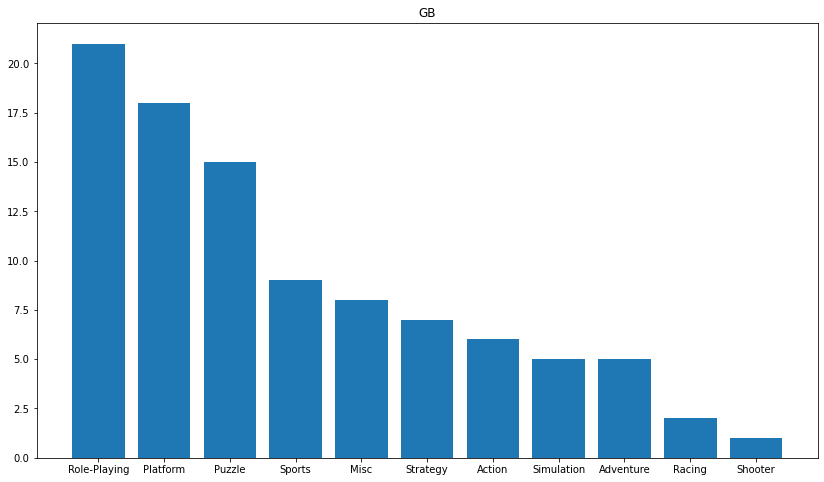


Aqui podemos ver que o GB vendeu mais jogos do gênero Role-Playing com um total de 21 jogos vendidos

Por outro lado vemos que o GB não fez muito sucesso com jogos do tipo Shooter vendendo apenas 1.

********************************************************************************


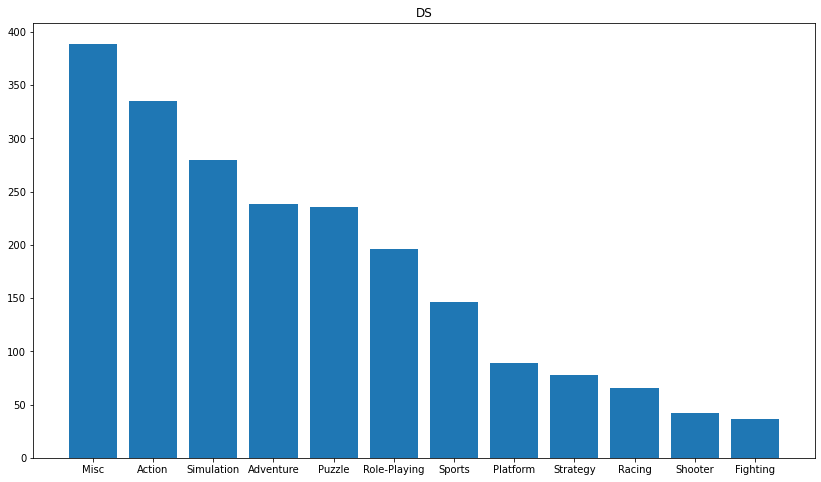


Aqui podemos ver que o DS vendeu mais jogos do gênero Misc com um total de 389 jogos vendidos

Por outro lado vemos que o DS não fez muito sucesso com jogos do tipo Fighting vendendo apenas 36.

********************************************************************************


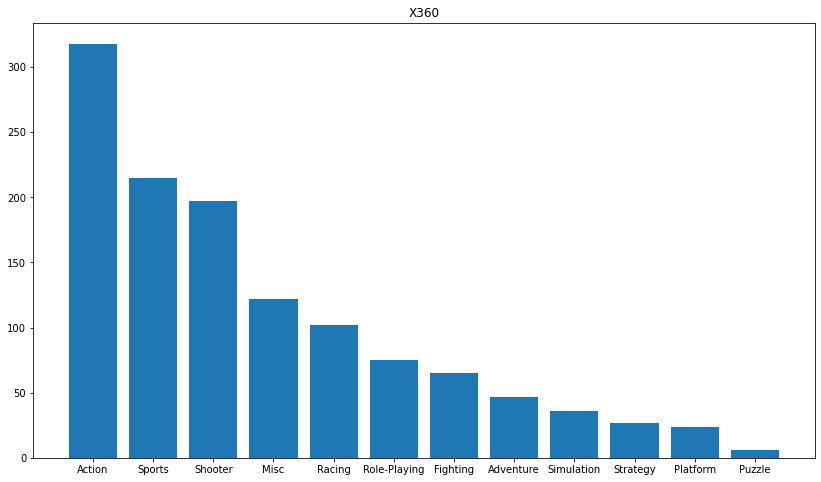


Aqui podemos ver que o X360 vendeu mais jogos do gênero Action com um total de 318 jogos vendidos

Por outro lado vemos que o X360 não fez muito sucesso com jogos do tipo Puzzle vendendo apenas 6.

********************************************************************************


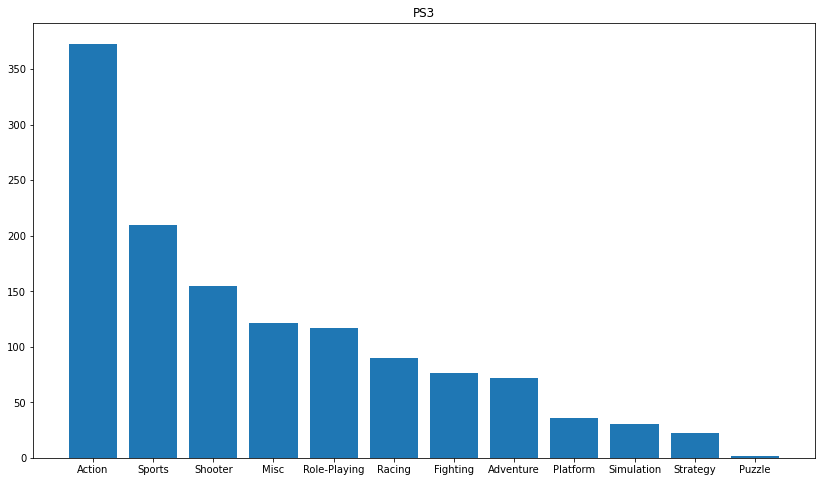


Aqui podemos ver que o PS3 vendeu mais jogos do gênero Action com um total de 373 jogos vendidos

Por outro lado vemos que o PS3 não fez muito sucesso com jogos do tipo Puzzle vendendo apenas 2.

********************************************************************************


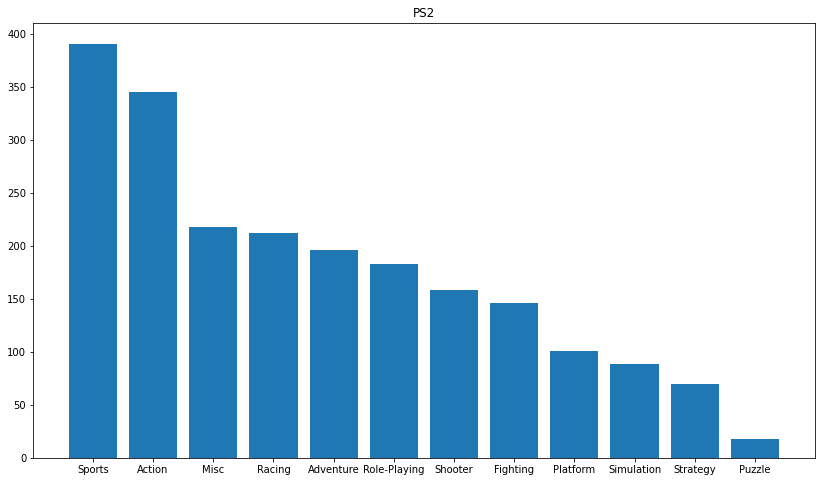


Aqui podemos ver que o PS2 vendeu mais jogos do gênero Sports com um total de 391 jogos vendidos

Por outro lado vemos que o PS2 não fez muito sucesso com jogos do tipo Puzzle vendendo apenas 18.

********************************************************************************


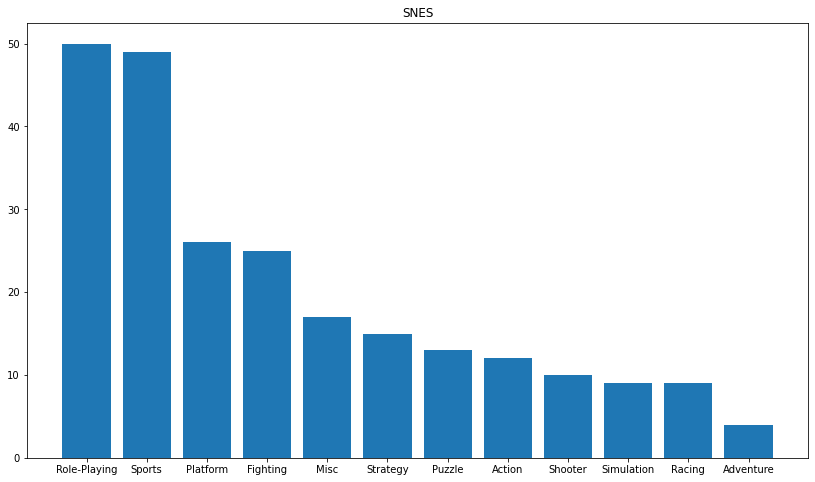


Aqui podemos ver que o SNES vendeu mais jogos do gênero Role-Playing com um total de 50 jogos vendidos

Por outro lado vemos que o SNES não fez muito sucesso com jogos do tipo Adventure vendendo apenas 4.

********************************************************************************


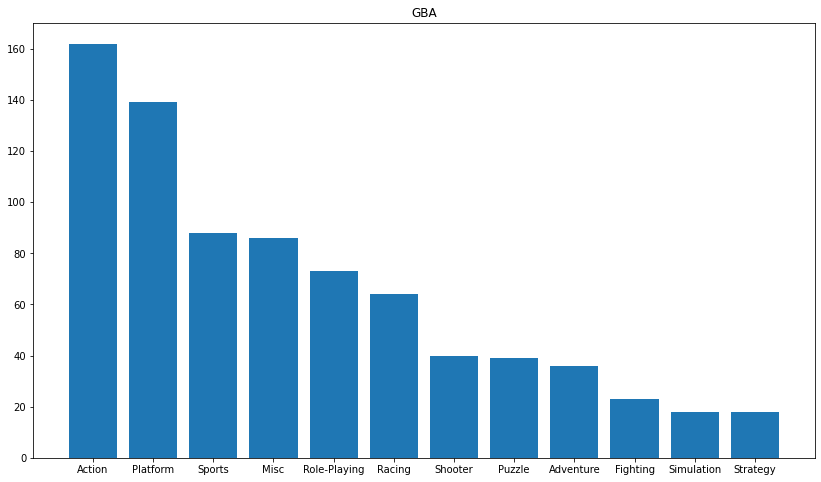


Aqui podemos ver que o GBA vendeu mais jogos do gênero Action com um total de 162 jogos vendidos

Por outro lado vemos que o GBA não fez muito sucesso com jogos do tipo Simulation vendendo apenas 18.

********************************************************************************


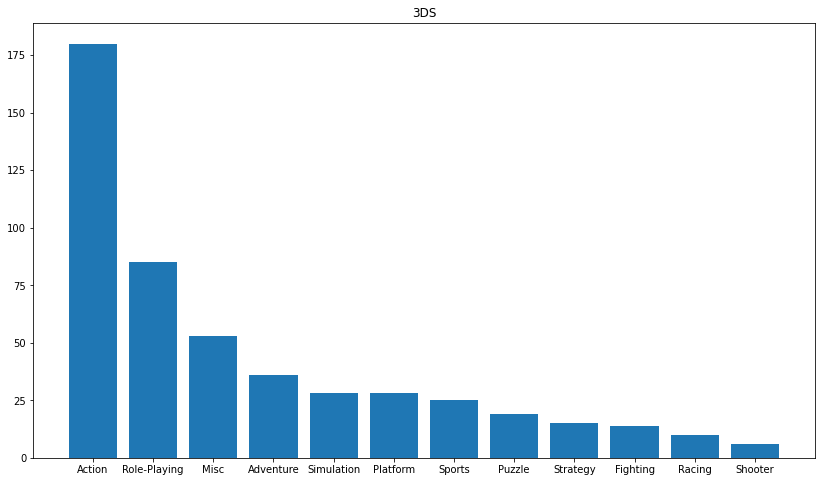


Aqui podemos ver que o 3DS vendeu mais jogos do gênero Action com um total de 180 jogos vendidos

Por outro lado vemos que o 3DS não fez muito sucesso com jogos do tipo Shooter vendendo apenas 6.

********************************************************************************


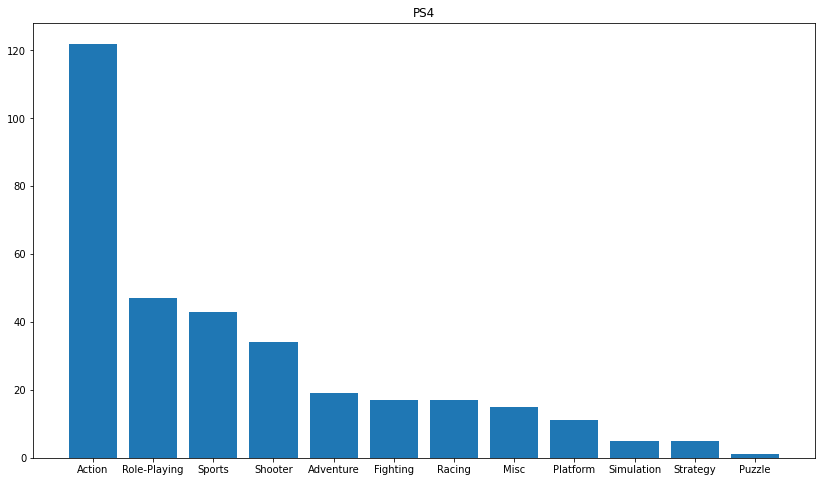


Aqui podemos ver que o PS4 vendeu mais jogos do gênero Action com um total de 122 jogos vendidos

Por outro lado vemos que o PS4 não fez muito sucesso com jogos do tipo Puzzle vendendo apenas 1.

********************************************************************************


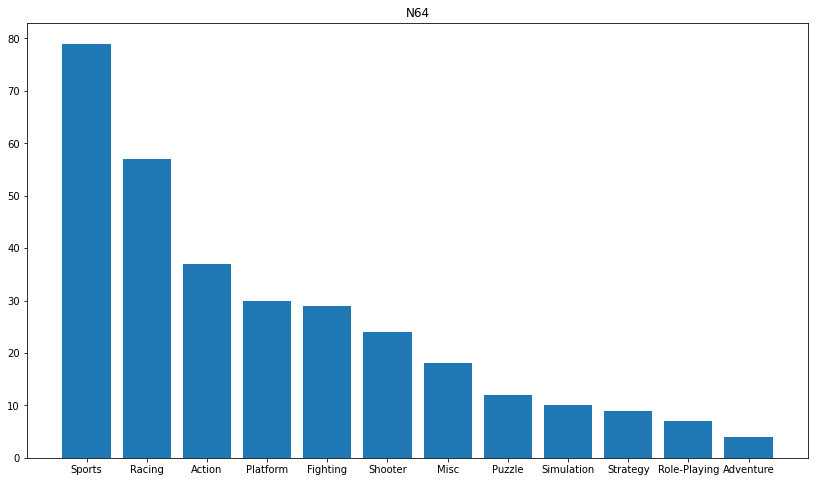


Aqui podemos ver que o N64 vendeu mais jogos do gênero Sports com um total de 79 jogos vendidos

Por outro lado vemos que o N64 não fez muito sucesso com jogos do tipo Adventure vendendo apenas 4.

********************************************************************************


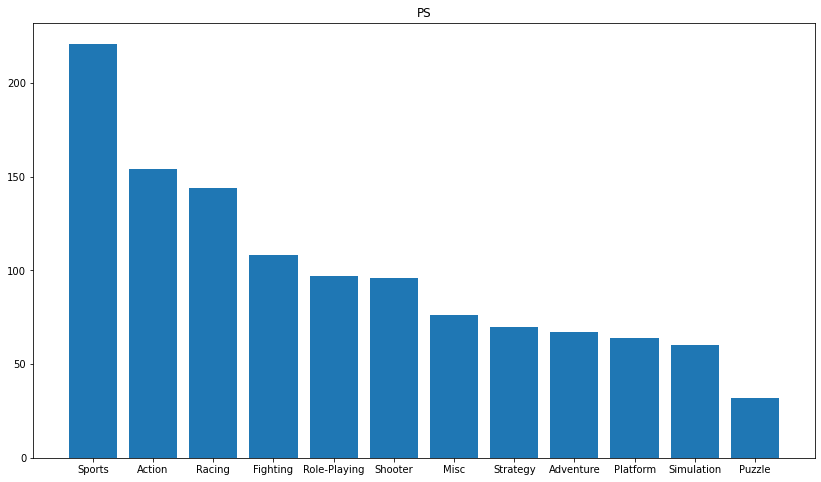


Aqui podemos ver que o PS vendeu mais jogos do gênero Sports com um total de 221 jogos vendidos

Por outro lado vemos que o PS não fez muito sucesso com jogos do tipo Puzzle vendendo apenas 32.

********************************************************************************


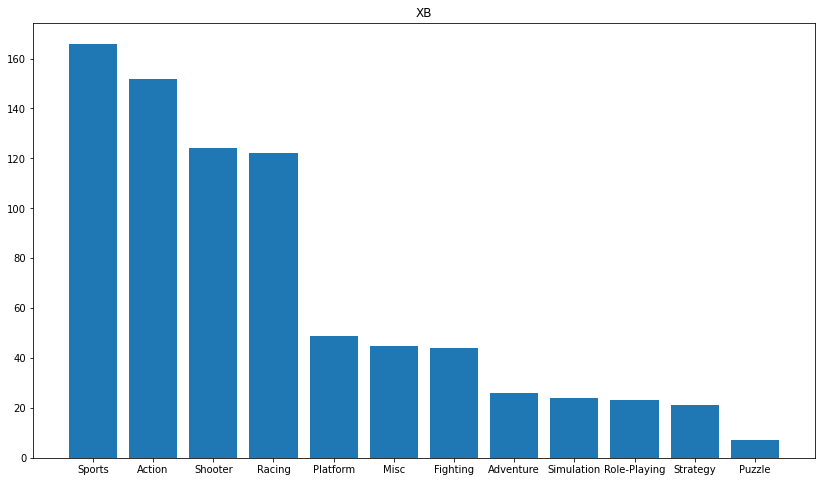


Aqui podemos ver que o XB vendeu mais jogos do gênero Sports com um total de 166 jogos vendidos

Por outro lado vemos que o XB não fez muito sucesso com jogos do tipo Puzzle vendendo apenas 7.

********************************************************************************


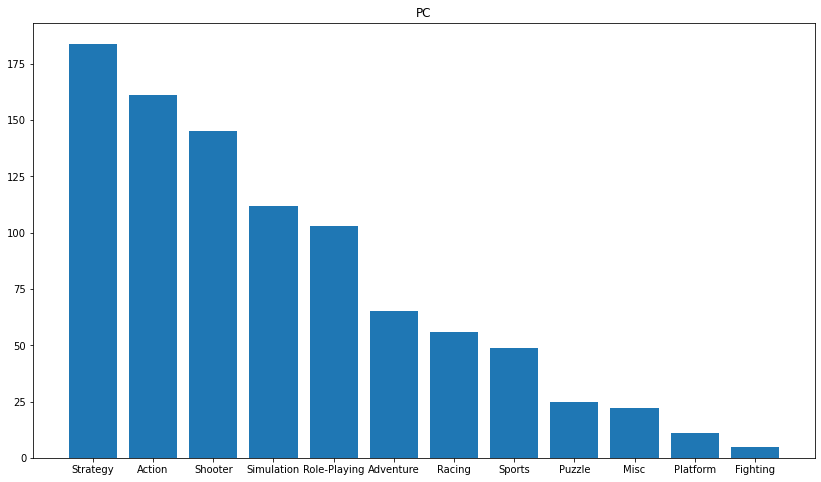


Aqui podemos ver que o PC vendeu mais jogos do gênero Strategy com um total de 184 jogos vendidos

Por outro lado vemos que o PC não fez muito sucesso com jogos do tipo Fighting vendendo apenas 5.

********************************************************************************


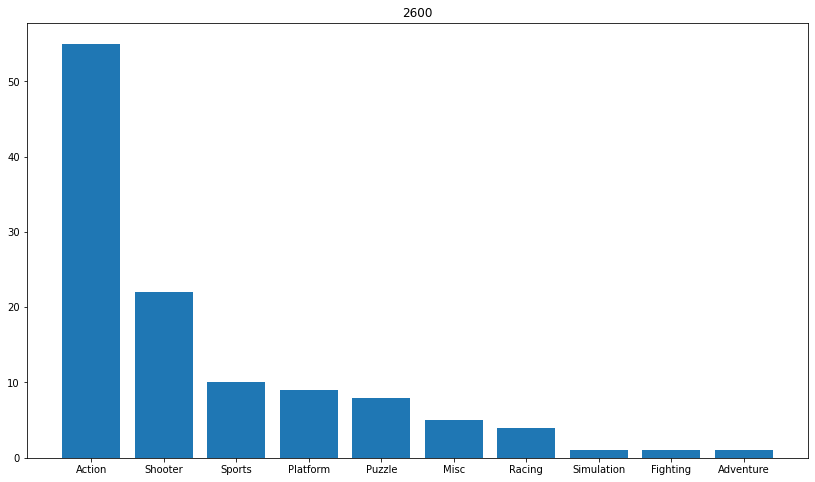


Aqui podemos ver que o 2600 vendeu mais jogos do gênero Action com um total de 55 jogos vendidos

Por outro lado vemos que o 2600 não fez muito sucesso com jogos do tipo Simulation vendendo apenas 1.

********************************************************************************


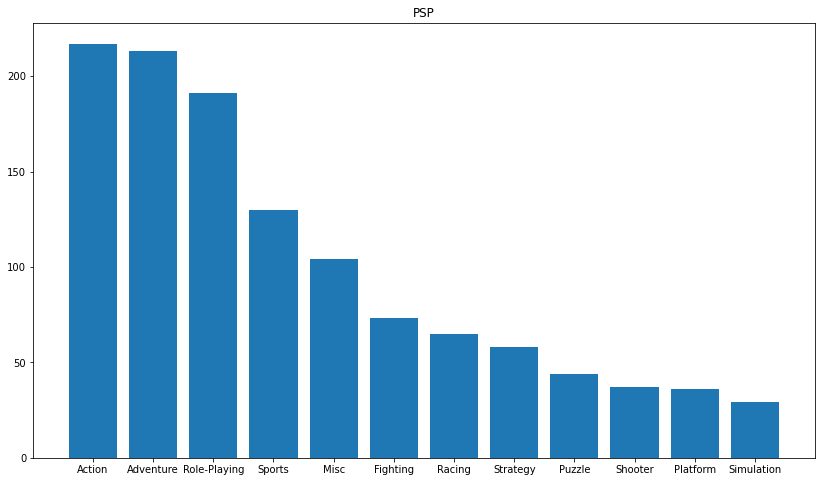


Aqui podemos ver que o PSP vendeu mais jogos do gênero Action com um total de 217 jogos vendidos

Por outro lado vemos que o PSP não fez muito sucesso com jogos do tipo Simulation vendendo apenas 29.

********************************************************************************


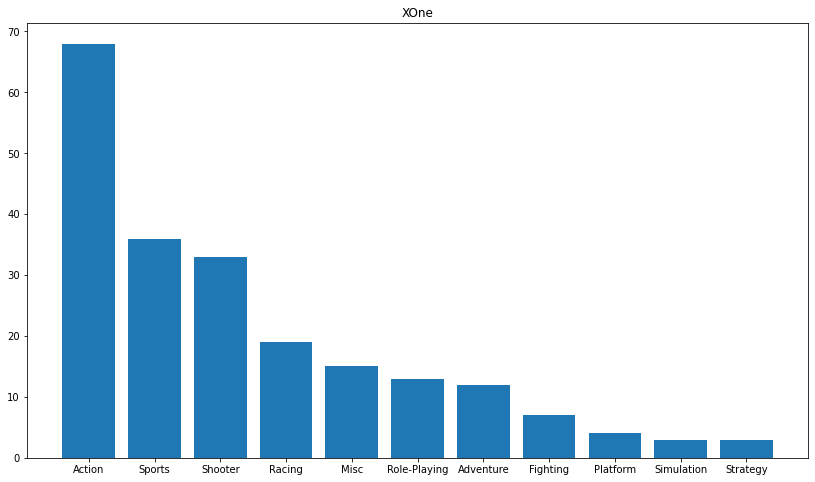


Aqui podemos ver que o XOne vendeu mais jogos do gênero Action com um total de 68 jogos vendidos

Por outro lado vemos que o XOne não fez muito sucesso com jogos do tipo Simulation vendendo apenas 3.

********************************************************************************


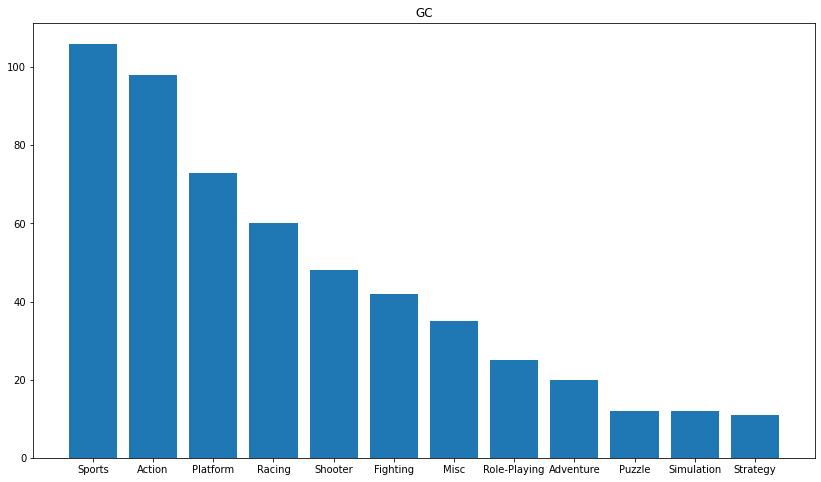


Aqui podemos ver que o GC vendeu mais jogos do gênero Sports com um total de 106 jogos vendidos

Por outro lado vemos que o GC não fez muito sucesso com jogos do tipo Strategy vendendo apenas 11.

********************************************************************************


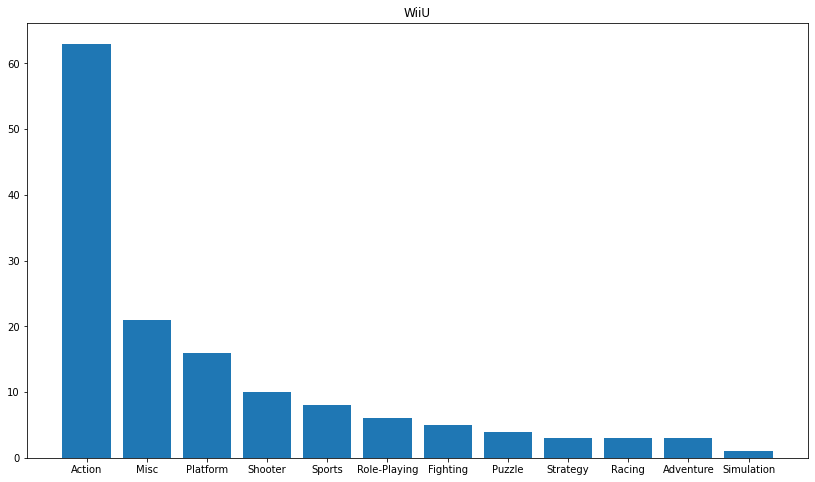


Aqui podemos ver que o WiiU vendeu mais jogos do gênero Action com um total de 63 jogos vendidos

Por outro lado vemos que o WiiU não fez muito sucesso com jogos do tipo Simulation vendendo apenas 1.

********************************************************************************


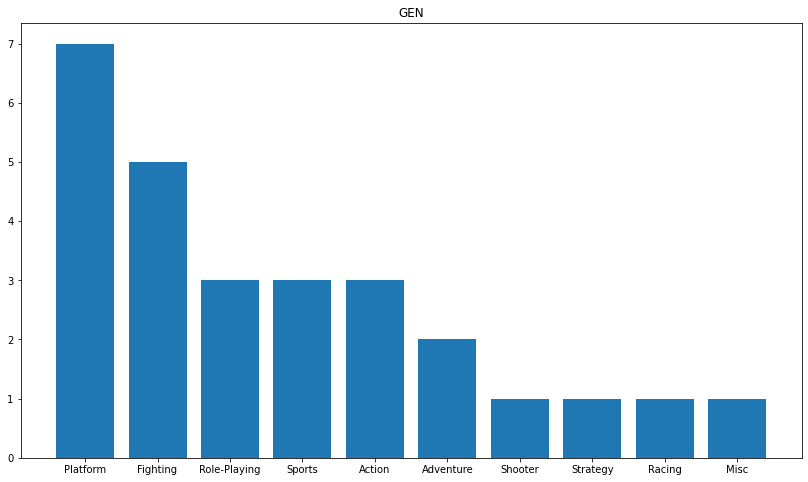


Aqui podemos ver que o GEN vendeu mais jogos do gênero Platform com um total de 7 jogos vendidos

Por outro lado vemos que o GEN não fez muito sucesso com jogos do tipo Shooter vendendo apenas 1.

********************************************************************************


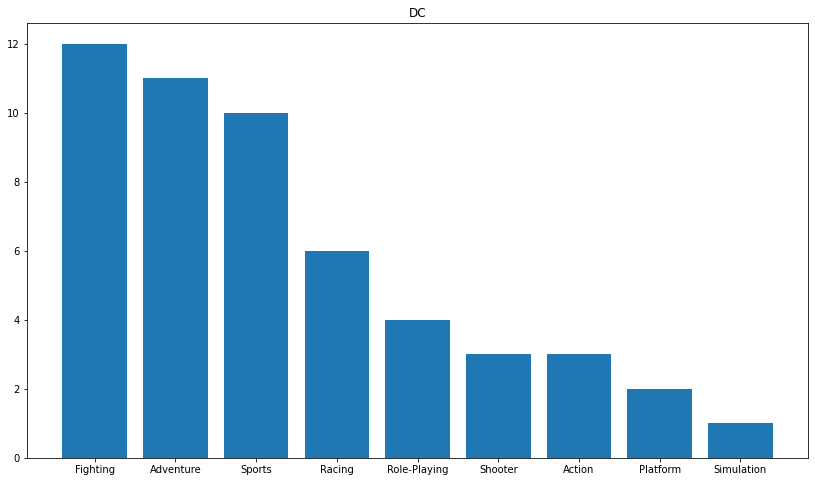


Aqui podemos ver que o DC vendeu mais jogos do gênero Fighting com um total de 12 jogos vendidos

Por outro lado vemos que o DC não fez muito sucesso com jogos do tipo Simulation vendendo apenas 1.

********************************************************************************


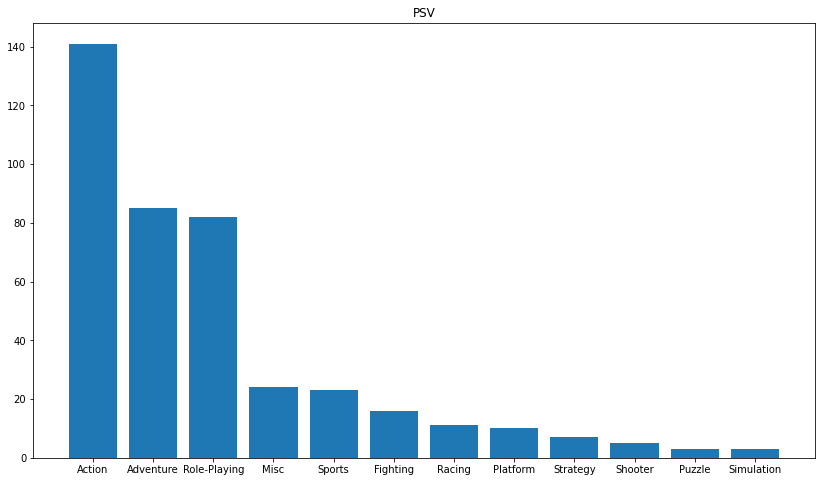


Aqui podemos ver que o PSV vendeu mais jogos do gênero Action com um total de 141 jogos vendidos

Por outro lado vemos que o PSV não fez muito sucesso com jogos do tipo Puzzle vendendo apenas 3.

********************************************************************************


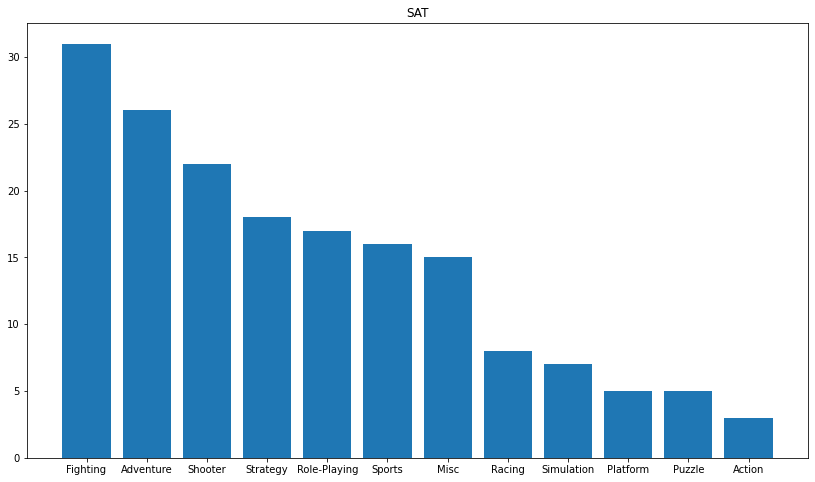


Aqui podemos ver que o SAT vendeu mais jogos do gênero Fighting com um total de 31 jogos vendidos

Por outro lado vemos que o SAT não fez muito sucesso com jogos do tipo Action vendendo apenas 3.

********************************************************************************


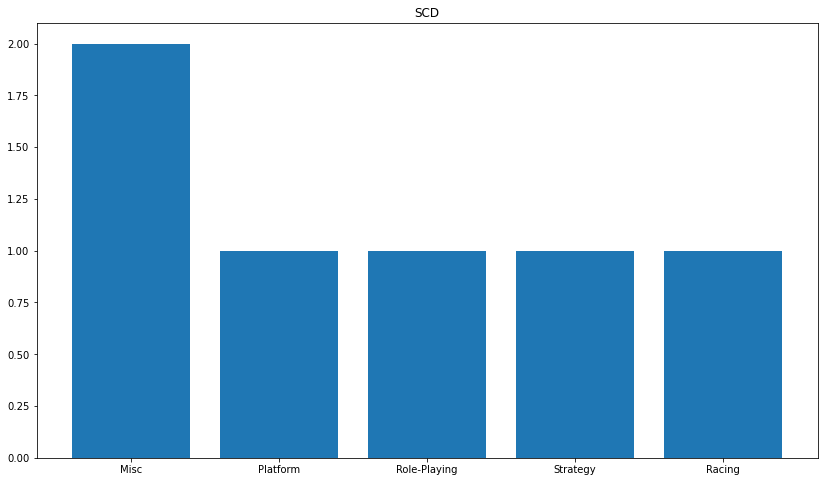


Aqui podemos ver que o SCD vendeu mais jogos do gênero Misc com um total de 2 jogos vendidos

Por outro lado vemos que o SCD não fez muito sucesso com jogos do tipo Platform vendendo apenas 1.

********************************************************************************


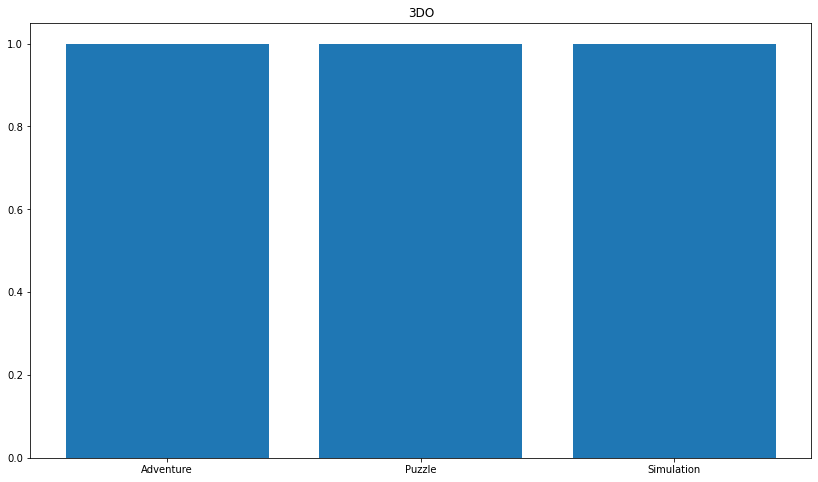


Aqui podemos ver que o 3DO vendeu mais jogos do gênero Adventure com um total de 1 jogos vendidos

Por outro lado vemos que o 3DO não fez muito sucesso com jogos do tipo Adventure vendendo apenas 1.

********************************************************************************
********************************************************************************

Consoles com poucas vendas (2 ou menos) não aparecem na lista.
********************************************************************************


In [19]:
for console in vgsales_semnul.Platform.unique():
    
    # DataFrame para filtrar o console
    filtro = vgsales_semnul[vgsales_semnul.Platform == console]
    if len(filtro.Genre.value_counts().values) > 2:
        x = filtro.Genre.value_counts().index
        y = filtro.Genre.value_counts()
        plt.bar(x, y)
        plt.title(console)
        plt.show()
        print(f'\nAqui podemos ver que o {console} vendeu mais jogos do gênero {filtro.Genre.value_counts().index[0]} '\
              f'com um total de {filtro.Genre.value_counts().max()} jogos vendidos\n')
        print(f'Por outro lado vemos que o {console} não fez muito sucesso com jogos do tipo {filtro.Genre.value_counts().sort_values().index[0]} '\
              f'vendendo apenas {filtro.Genre.value_counts().min()}.\n')
        print('*'*80)
    else:
        continue

print('*'*80)
print(f'\nConsoles com poucas vendas (2 ou menos) não aparecem na lista.')
print('*'*80)

In [20]:
vgsales_semnul.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


Text(1995, 0.088235, '1989, 0.088235')

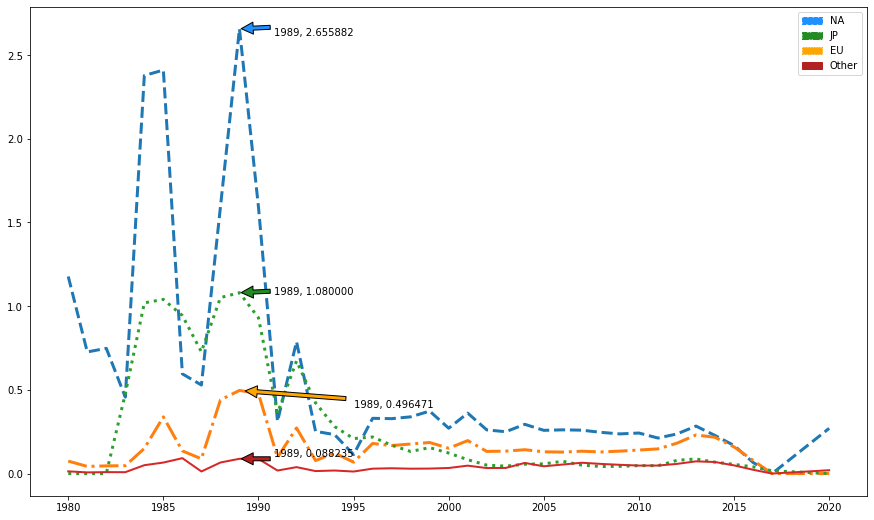

In [31]:
# Agrupando as vendas por ano para uma comparação gráfica
rcParams['figure.figsize'] = 15,9
yearlysales = vgsales_semnul[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
groupyearsales = yearlysales.groupby('Year').mean()

# Define as legendas
legNA = mpatches.Patch(label='NA', color='dodgerblue', ls='--')
legJP = mpatches.Patch(label='JP', color='forestgreen', ls='-.')
legEU = mpatches.Patch(label='EU', color='orange', ls=':')
legOT = mpatches.Patch(label='Other', color='firebrick')

# Chama o gráfico e as legendas
plt.plot(groupyearsales.index, groupyearsales.NA_Sales, ls='--', lw=3)
plt.plot(groupyearsales.index, groupyearsales.EU_Sales, ls='-.', lw=3)
plt.plot(groupyearsales.index, groupyearsales.JP_Sales, ls=':' ,lw=3)
plt.plot(groupyearsales.index, groupyearsales.Other_Sales, ls='-', lw=2)
plt.legend(handles=[legNA, legJP, legEU, legOT])

# Maior media de venda NA/Ano
plt.annotate('1989, 2.655882', xy=(1989, 2.655882), xytext=(1995, 2.665882),
            arrowprops=dict(facecolor='dodgerblue', shrink=0.05,),
            horizontalalignment='right', verticalalignment='top')
# Maior media de venda JP/Ano
plt.annotate('1989, 1.080000', xy=(1989, 1.080000), xytext=(1995, 1.060000),
            arrowprops=dict(facecolor='forestgreen', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

# Maior media de venda EU/Ano
plt.annotate('1989, 0.496471', xy=(1989, 0.496471), xytext=(1995, 0.396471),
            arrowprops=dict(facecolor='orange', shrink=0.05),
            horizontalalignment='left')

# Maior media de venda Other/Ano
plt.annotate('1989, 0.088235', xy=(1989, 0.088235), xytext=(1995, 0.088235),
            arrowprops=dict(facecolor='firebrick', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')